In the second part of this assignment, we will implement K-means Clustering and kernel K-means Clustering.

In [143]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics

**K-means Clustering Implementation**

Follow the comments! They'll give you instructions on what to code.

In [144]:
def kmeans(data, k):
    num_data = np.shape(data)[0]
    # First, randomly pick k data points for the centers of the initial clusters. Maybe you should use the np.random.choice() function.
    # Afterwards, initialize the clusters.
    cluster_mean = data[np.random.choice(range(num_data), k)]
    mean_dist_mat = np.linalg.norm(np.expand_dims(data, axis = 0) - np.expand_dims(cluster_mean, axis = 1), axis = 2)
    print(np.shape(np.expand_dims(data, axis = 0)), np.shape(np.expand_dims(cluster_mean, axis = 1)))
    #(2,1000)
    cluster_allocation = np.argmin(mean_dist_mat, axis = 0)
    # Update the clusters until convergence.
    updated = True
    while updated:
        updated = False

        # Calculate the cluster means.
        cluster_mean = np.array([np.sum(data[cluster_allocation==i],axis=0)/np.sum(cluster_allocation==i) for i in range(k)])
        print(np.shape(data[cluster_allocation==0]), np.shape(data[cluster_allocation==1]))
        # Find out which new cluster each data point belongs to
        mean_dist_mat = np.linalg.norm(np.expand_dims(data, axis = 0) - np.expand_dims(cluster_mean, axis = 1), axis = 2)
        new_cluster_allocation = np.argmin(mean_dist_mat, axis = 0)

        # Update the cluster allocation. If nothing changes, exit the loop and return the converged result.
        if not np.array_equal(cluster_allocation, new_cluster_allocation):
            updated = True
            cluster_allocation = new_cluster_allocation
        else:
            loss = np.sum(np.min(mean_dist_mat, axis = 0))
    return cluster_allocation, loss

**Kernel K-means Clustering Implementation**

We will now implement Kernel K-means Clustering using a Gaussian kernel.

In [145]:
# This function should return the cluster labels and the value of the objective function for kernel k-means.
def kernel_kmeans(data, k, s, kernel = 'gaussian'):
    # The variable s refers to the value of sigma in the Gaussian kernel.
    num_data = np.shape(data)[0]
    # First, randomly pick k data points for the centers of the initial clusters. Maybe you should use the np.random.choice() function.
    # Afterwards, initialize the clusters.
    cluster_mean = data[np.random.choice(range(num_data), k)]
    mean_dist_mat = np.linalg.norm(np.expand_dims(data, axis = 0) - np.expand_dims(cluster_mean, axis = 1), axis = 2)
    cluster_allocation = np.argmin(mean_dist_mat, axis = 0)
    # Pre-calculate kernel values and save it in a matrix.
    # You can use sklearn.metrics.pairwise_distances(data) to get the pairwise distance of vectors in the data.
    # Gaussian kernel
    if kernel == 'gaussian':
        pre_cal = np.exp(-np.square(metrics.pairwise_distances(data))/(2*(s**2)))
    else:
        print("no such kernel")

    # Update the clusters until convergence.
    updated = True
    while updated:
        updated = False

        # Find out which new cluster each data point belongs to
        mean_dist_mat = [1-2*np.sum(pre_cal[:,cluster_allocation==idx], axis = 1)/np.sum(cluster_allocation==idx)
                         +np.sum(pre_cal[cluster_allocation==idx][:, cluster_allocation==idx])/(np.sum(cluster_allocation==idx)**2)
                         for idx in range(k)]
        new_cluster_allocation = np.argmin(mean_dist_mat, axis = 0)

        # Update cluster allocation. If nothing changes, exit the loop and return the converged result.
        if not np.array_equal(cluster_allocation, new_cluster_allocation):
            updated = True
            cluster_allocation = new_cluster_allocation
        else:
            loss = np.sum(np.min(mean_dist_mat, axis = 0))
    return cluster_allocation, loss


Now, implementation is done.

Let's check the model's performance with an example we've seen in class.


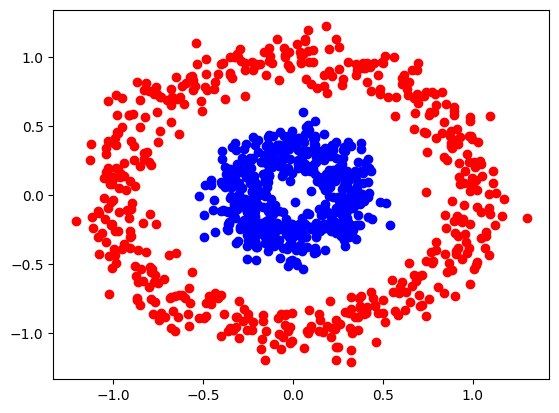

In [146]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=1000, noise = 0.1, factor = 0.3, random_state = 10)
plt.figure()
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue')
plt.show()

(1, 1000, 2) (2, 1, 2)
(826, 2) (174, 2)
(758, 2) (242, 2)
(688, 2) (312, 2)
(622, 2) (378, 2)
(576, 2) (424, 2)
(544, 2) (456, 2)
(525, 2) (475, 2)
(514, 2) (486, 2)
(510, 2) (490, 2)
(507, 2) (493, 2)
(500, 2) (500, 2)
(494, 2) (506, 2)
(492, 2) (508, 2)
(493, 2) (507, 2)
(492, 2) (508, 2)
(491, 2) (509, 2)
(1, 1000, 2) (2, 1, 2)
(452, 2) (548, 2)
(476, 2) (524, 2)
(493, 2) (507, 2)
(506, 2) (494, 2)
(514, 2) (486, 2)
(517, 2) (483, 2)
(519, 2) (481, 2)
(520, 2) (480, 2)
(521, 2) (479, 2)
(522, 2) (478, 2)
(1, 1000, 2) (2, 1, 2)
(168, 2) (832, 2)
(245, 2) (755, 2)
(320, 2) (680, 2)
(381, 2) (619, 2)
(423, 2) (577, 2)
(446, 2) (554, 2)
(457, 2) (543, 2)
(461, 2) (539, 2)
(464, 2) (536, 2)
(465, 2) (535, 2)
(1, 1000, 2) (2, 1, 2)
(827, 2) (173, 2)
(761, 2) (239, 2)
(693, 2) (307, 2)
(624, 2) (376, 2)
(575, 2) (425, 2)
(543, 2) (457, 2)
(520, 2) (480, 2)
(509, 2) (491, 2)
(501, 2) (499, 2)
(497, 2) (503, 2)
(495, 2) (505, 2)
(493, 2) (507, 2)
(1, 1000, 2) (2, 1, 2)
(157, 2) (843, 2)
(23

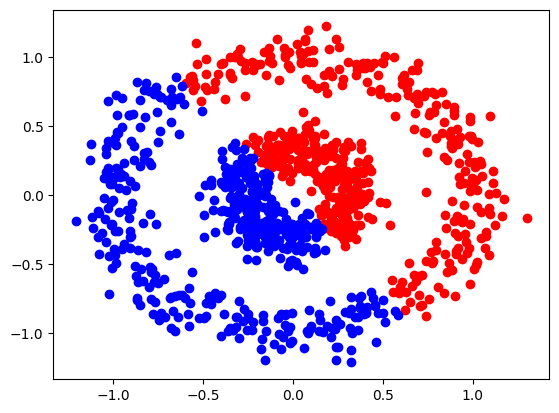

NMI score of K-means clustering:  0.0004879010473852295


In [147]:
# Run k-means clustering. This cell should print the NMI score of your model.
np.random.seed(1)
loss = np.inf
for _ in range(10):
    kmeans_result,loss_tmp = kmeans(X, k=2)
    if loss > loss_tmp:
        loss = loss_tmp
        best_kmeans_result = kmeans_result
        score = metrics.normalized_mutual_info_score(y, kmeans_result)

# Visualize the result of the k-means clustering.
plt.figure()
plt.scatter(X[kmeans_result == 0,0], X[kmeans_result == 0,1], color = 'red')
plt.scatter(X[kmeans_result == 1,0], X[kmeans_result == 1,1], color = 'blue')
plt.show()
print("NMI score of K-means clustering: ",score)

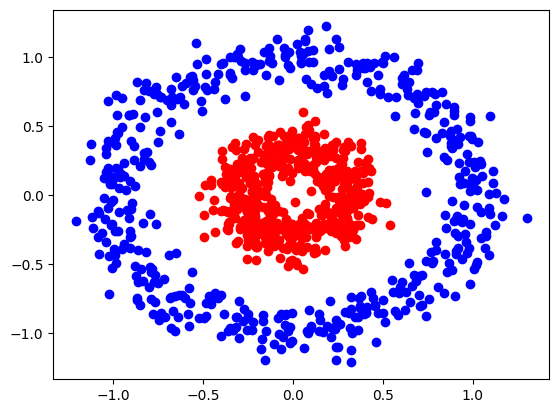

NMI score of kernel K-means clustering:  1.0


In [148]:
# Run k-means clustering. This cell should print the NMI score of your model.
# Feel free to experiment with hyperparameter s (Use 0.5 as default)
np.random.seed(1)
loss = np.inf
for _ in range(10):
    kkmeans_result,loss_tmp = kernel_kmeans(X, k=2, s = 0.5)
    if loss > loss_tmp:
        loss = loss_tmp
        best_kkmeans_result = kkmeans_result
        score = metrics.normalized_mutual_info_score(y, kkmeans_result)

# Visualize the result of the kernel k-means clustering.
plt.figure()
plt.scatter(X[best_kkmeans_result == 0,0], X[best_kkmeans_result == 0,1], color = 'red')
plt.scatter(X[best_kkmeans_result == 1,0], X[best_kkmeans_result == 1,1], color = 'blue')
plt.show()
print("NMI score of kernel K-means clustering: ",score)